In [1]:
import torch
import torch.nn as nn
import torchvision
from matplotlib import pyplot as plt
from tqdm import tqdm

from src.spatial_transformer_former import VariationalSpatialTransformer

device = torch.device("cuda:0")

# Define some utility functions

In [2]:
def display_images(images):
    if isinstance(images, torch.Tensor):
        images = images.detach().cpu().numpy()
    for i in range(images.shape[0]):
        img = images[i].transpose([1, 2, 0])
        img = img - img.min()
        img = img / img.max()
        plt.imshow(img)
        plt.show()

# Load CIFAR100 data

In [3]:
preprocessor = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0.0, 1.0)
])

dataset = torchvision.datasets.CIFAR10(
    './data/CIFAR100/',
    train=True,
    transform=preprocessor
)
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=4,
    shuffle=True,
    num_workers=1
)

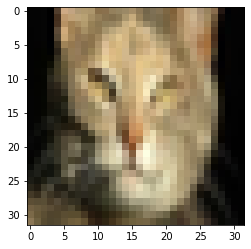

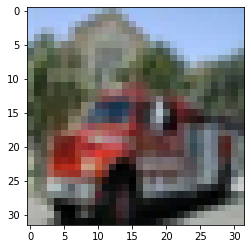

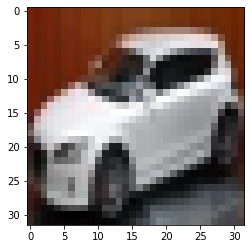

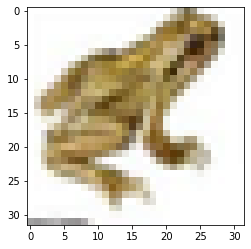

In [4]:
for img, label in data_loader:
    break
display_images(img)

In [5]:
st = VariationalSpatialTransformer(
    loc_layer=torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
        torch.nn.MaxPool2d(kernel_size=3, stride=2),
        torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
        torch.nn.MaxPool2d(kernel_size=3, stride=2),
    ),
    image_shape=(3, 32, 32),
    target_shape=(3, 128, 128),
    num_samples=16,
    initial_sigma=0.25
)

800


In [6]:
output = st(x=img)

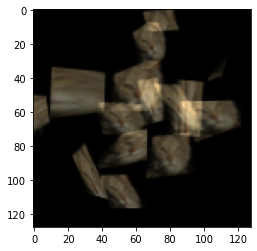

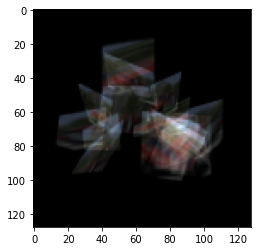

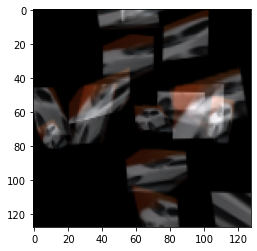

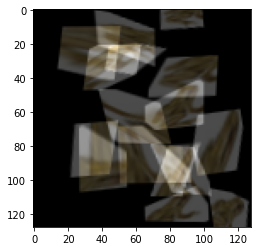

In [7]:
display_images(output)

In [8]:
 st_stack = torch.nn.Sequential(
    VariationalSpatialTransformer(
        loc_layer=torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        ),
        image_shape=(3, 32, 32),
        target_shape=(3, 128, 128),
        num_samples=16,
        initial_sigma=0.25
    ),
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding="same"),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding="same"),
    nn.MaxPool2d(kernel_size=3, stride=2),
    VariationalSpatialTransformer(
        loc_layer=torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        ),
        image_shape=(32, 32, 32),
        target_shape=(32, 128, 128),
        num_samples=16,
        initial_sigma=0.25
    )
)

800
800


In [9]:
output = st_stack(img)

In [10]:
output.shape

torch.Size([4, 32, 128, 128])